# EDA | Разведочный анализ данных

- [Диаграммы с накоплением для таргета](#Диаграммы-с-накоплением-для-таргета)
- [Диаграммы с накоплением для фичей](#Диаграммы-с-накоплением-для-фичей)

In [1]:
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
DATA_PATH = os.path.join('data', 'transactions')
TARGET_PATH = os.path.join('data', 'beeline_antispam_hakaton_id_samples.csv')

In [3]:
TARGETS = [0., 1., 2., 3., 4.]
LABELS = [
    'не спам',
    'небольшие полезные ИП / малые бизнесы',
    'организации',
    'мобильная карусель',
    'чёрные спаммеры и мошенники',
]
COLORS = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:gray']

# Диаграммы с накоплением для таргета

In [4]:
data_paths = [os.path.join(DATA_PATH, file_name) for file_name in os.listdir(DATA_PATH)]

targets = pd.read_csv(TARGET_PATH, dtype={
    'id': 'uint32',
    'target': 'float32',
    'split': 'category',
})
targets.head()

,id,target,split
0,196535,NaN,test
1,63075900,2.0,train
2,35233935,2.0,train
3,23557360,4.0,train
4,78926486,NaN,test


In [5]:
targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46235 entries, 0 to 46234
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      46235 non-null  uint32  
 1   target  36942 non-null  float32 
 2   split   46235 non-null  category
dtypes: category(1), float32(1), uint32(1)
memory usage: 406.5 KB


In [6]:
dates = []  # даты

transactions_0_a, transactions_0_b = [], []
transactions_1_a, transactions_1_b = [], []
transactions_2_a, transactions_2_b = [], []
transactions_3_a, transactions_3_b = [], []
transactions_4_a, transactions_4_b = [], []
transactions_test_a, transactions_test_b = [], []
transactions_unlabeled_a, transactions_unlabeled_b = [], []

ids_0_a, ids_0_b = [], []
ids_1_a, ids_1_b = [], []
ids_2_a, ids_2_b = [], []
ids_3_a, ids_3_b = [], []
ids_4_a, ids_4_b = [], []
ids_test_a, ids_test_b = [], []
ids_unlabeled_a, ids_unlabeled_b = [], []

for data_path in data_paths:
    date = data_path.replace(os.path.join('data', 'transactions', 'time_key='), '').replace('.csv', '').replace('-', '.')
    dates.append(date)
    
    calls = pd.read_csv(data_path, usecols=['id_a', 'id_b'], dtype={'id_a': 'uint32', 'id_b': 'uint32'})
    calls = (
        calls
        .merge(targets, left_on='id_a', right_on='id', how='left')
        .rename(columns={'target': 'target_a', 'split': 'split_a'})
        .drop('id', axis=1)
    )
    calls = (
        calls
        .merge(targets, left_on='id_b', right_on='id', how='left')
        .rename(columns={'target': 'target_b', 'split': 'split_b'})
        .drop('id', axis=1)
    )

    # распределения для отдельных транзакций
    # для id_a
    transactions_0_a.append(calls.loc[calls['target_a'] == 0.].shape[0])
    transactions_1_a.append(calls.loc[calls['target_a'] == 1.].shape[0])
    transactions_2_a.append(calls.loc[calls['target_a'] == 2.].shape[0])
    transactions_3_a.append(calls.loc[calls['target_a'] == 3.].shape[0])
    transactions_4_a.append(calls.loc[calls['target_a'] == 4.].shape[0])
    transactions_test_a.append(calls.loc[calls['split_a'] == 'test'].shape[0])
    transactions_unlabeled_a.append(calls['split_a'].isna().sum())
    # для id_b
    transactions_0_b.append(calls.loc[calls['target_b'] == 0.].shape[0])
    transactions_1_b.append(calls.loc[calls['target_b'] == 1.].shape[0])
    transactions_2_b.append(calls.loc[calls['target_b'] == 2.].shape[0])
    transactions_3_b.append(calls.loc[calls['target_b'] == 3.].shape[0])
    transactions_4_b.append(calls.loc[calls['target_b'] == 4.].shape[0])
    transactions_test_b.append(calls.loc[calls['split_b'] == 'test'].shape[0])
    transactions_unlabeled_b.append(calls['split_b'].isna().sum())

    # распределение уникальных id
    # для id_a
    ids_0_a.append(len(calls.loc[calls['target_a'] == 0., 'id_a'].unique()))
    ids_1_a.append(len(calls.loc[calls['target_a'] == 1., 'id_a'].unique()))
    ids_2_a.append(len(calls.loc[calls['target_a'] == 2., 'id_a'].unique()))
    ids_3_a.append(len(calls.loc[calls['target_a'] == 3., 'id_a'].unique()))
    ids_4_a.append(len(calls.loc[calls['target_a'] == 4., 'id_a'].unique()))
    ids_test_a.append(len(calls.loc[calls['split_a'] == 'test', 'id_a'].unique()))
    ids_unlabeled_a.append(len(calls.loc[calls['split_a'].isna(), 'id_a'].unique()))
    # для id_b
    ids_0_b.append(len(calls.loc[calls['target_b'] == 0., 'id_b'].unique()))
    ids_1_b.append(len(calls.loc[calls['target_b'] == 1., 'id_b'].unique()))
    ids_2_b.append(len(calls.loc[calls['target_b'] == 2., 'id_b'].unique()))
    ids_3_b.append(len(calls.loc[calls['target_b'] == 3., 'id_b'].unique()))
    ids_4_b.append(len(calls.loc[calls['target_b'] == 4., 'id_b'].unique()))
    ids_test_b.append(len(calls.loc[calls['split_b'] == 'test', 'id_b'].unique()))
    ids_unlabeled_b.append(len(calls.loc[calls['split_b'].isna(), 'id_b'].unique()))

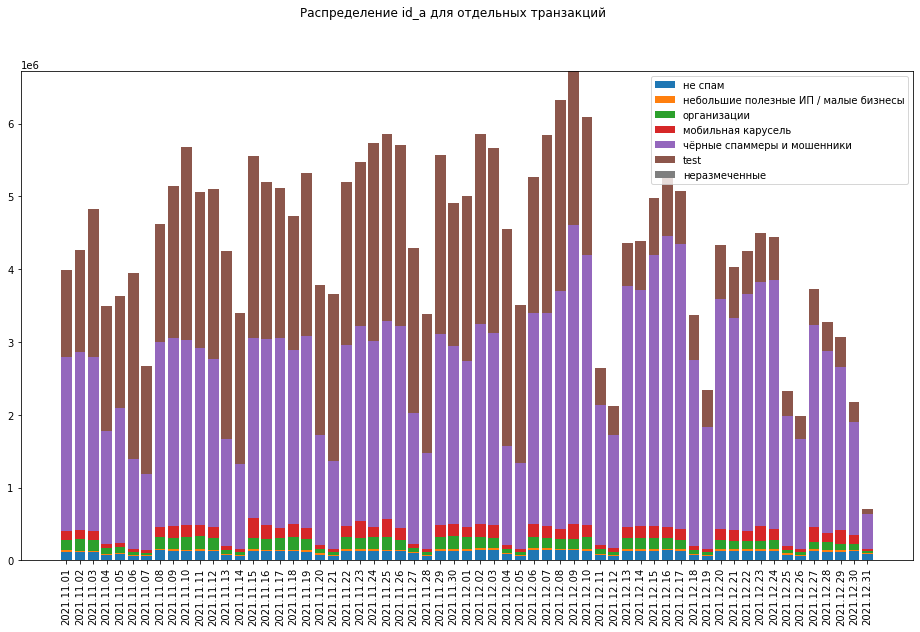

In [7]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.bar(dates, transactions_0_a, label=LABELS[0], color=COLORS[0])
bottom = np.array(transactions_0_a)
ax.bar(dates, transactions_1_a, label=LABELS[1], bottom=bottom, color=COLORS[1])
bottom += np.array(transactions_1_a)
ax.bar(dates, transactions_2_a, label=LABELS[2], bottom=bottom, color=COLORS[2])
bottom += np.array(transactions_2_a)
ax.bar(dates, transactions_3_a, label=LABELS[3], bottom=bottom, color=COLORS[3])
bottom += np.array(transactions_3_a)
ax.bar(dates, transactions_4_a, label=LABELS[4], bottom=bottom, color=COLORS[4])
bottom += np.array(transactions_4_a)
ax.bar(dates, transactions_test_a, label='test', bottom=bottom, color=COLORS[5])
bottom += np.array(transactions_test_a)
ax.bar(dates, transactions_unlabeled_a, label='неразмеченные', bottom=bottom, color=COLORS[6])

ax.legend()
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
fig.suptitle('Распределение id_a для отдельных транзакций')

plt.show()

In [8]:
bottom += np.array(transactions_unlabeled_a)

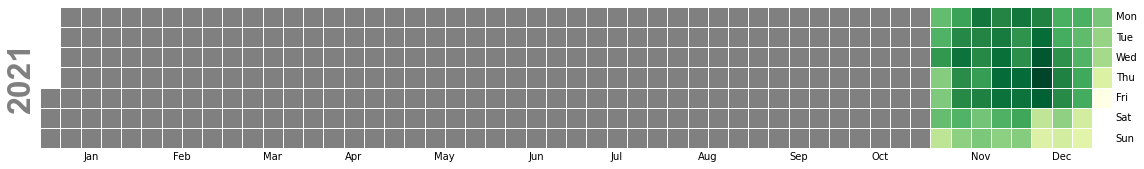

In [9]:
import calmap

# TODO: здесь не работают почему-то параметры `monthlabels` и `monthticks`
# может стоит залезть в исходный код
# https://pythonhosted.org/calmap/
# хотелось вывести только 2 необходимых месяца
_ = calmap.calendarplot(
    pd.Series(data=bottom, index=pd.DatetimeIndex(dates)),
    fig_kws={'figsize': (16, 10)},
    fillcolor='gray',
    cmap='YlGn',
)

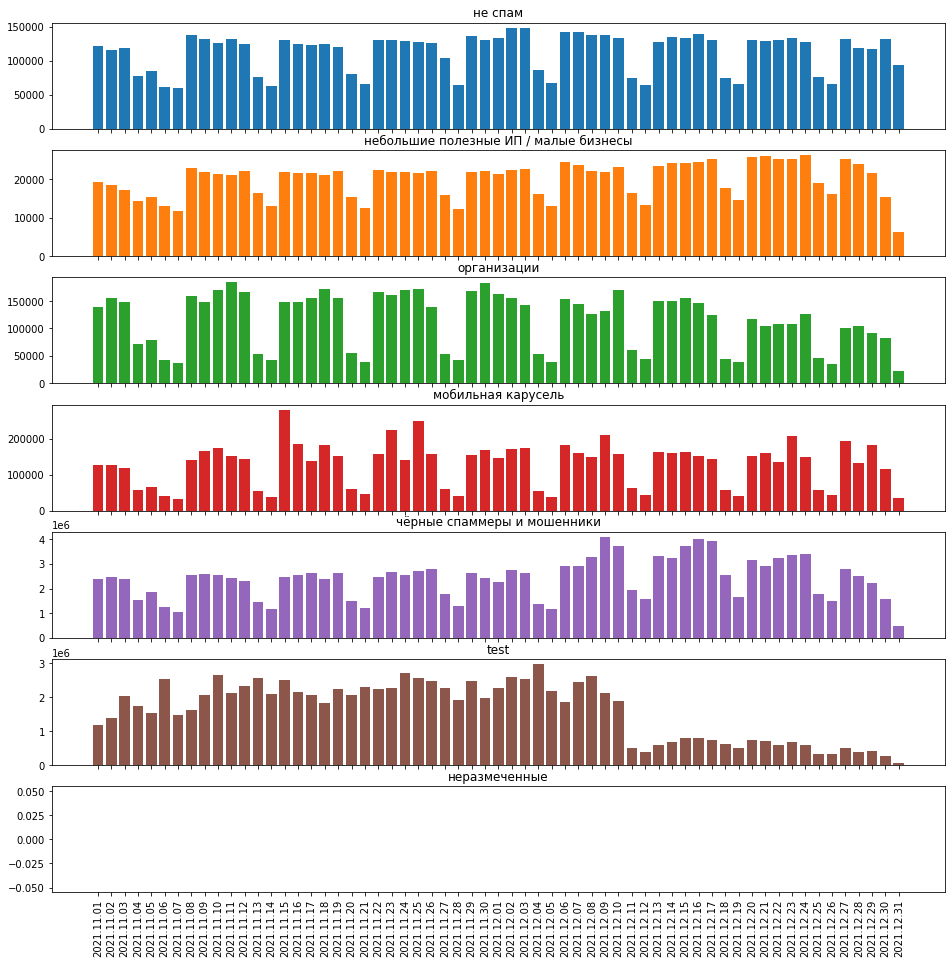

In [10]:
fig, axes = plt.subplots(7, 1, figsize=(16, 16), sharex=True)

axes[0].bar(dates, transactions_0_a, color=COLORS[0])
axes[1].bar(dates, transactions_1_a, color=COLORS[1])
axes[2].bar(dates, transactions_2_a, color=COLORS[2])
axes[3].bar(dates, transactions_3_a, color=COLORS[3])
axes[4].bar(dates, transactions_4_a, color=COLORS[4])
axes[5].bar(dates, transactions_test_a, color=COLORS[5])
axes[6].bar(dates, transactions_unlabeled_a, color=COLORS[6])

axes[0].set_title(LABELS[0])
axes[1].set_title(LABELS[1])
axes[2].set_title(LABELS[2])
axes[3].set_title(LABELS[3])
axes[4].set_title(LABELS[4])
axes[5].set_title('test')
axes[6].set_title('неразмеченные')

for tick in axes[6].get_xticklabels():
    tick.set_rotation(90)

plt.show()

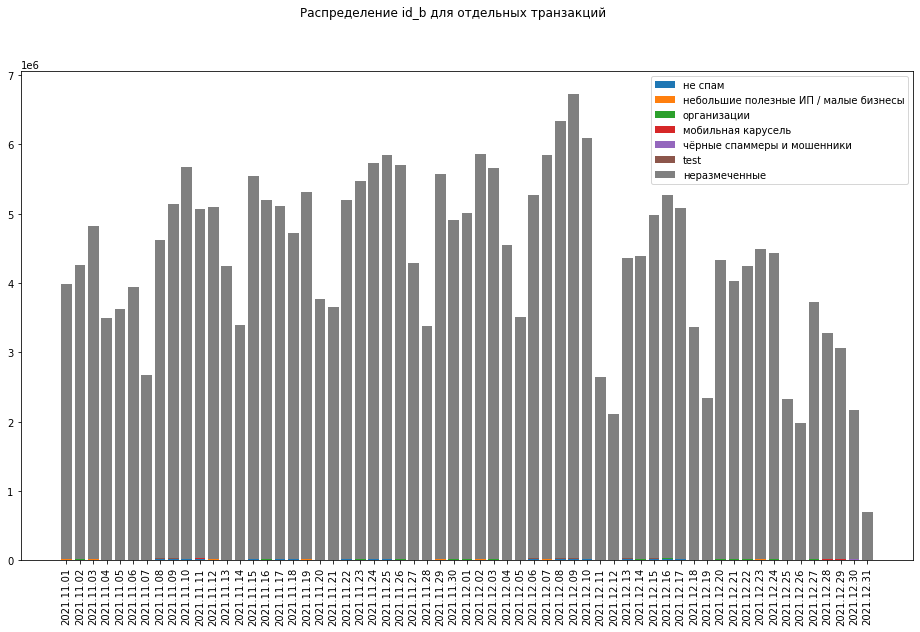

In [11]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.bar(dates, transactions_0_b, label=LABELS[0])
bottom = np.array(transactions_0_b)
ax.bar(dates, transactions_1_b, label=LABELS[1], bottom=bottom)
bottom += np.array(transactions_1_b)
ax.bar(dates, transactions_2_b, label=LABELS[2], bottom=bottom)
bottom += np.array(transactions_2_b)
ax.bar(dates, transactions_3_b, label=LABELS[3], bottom=bottom)
bottom += np.array(transactions_3_b)
ax.bar(dates, transactions_4_b, label=LABELS[4], bottom=bottom)
bottom += np.array(transactions_4_b)
ax.bar(dates, transactions_test_b, label='test', bottom=bottom)
bottom += np.array(transactions_test_b)
ax.bar(dates, transactions_unlabeled_b, label='неразмеченные', bottom=bottom, color='gray')

ax.legend()
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
fig.suptitle('Распределение id_b для отдельных транзакций')

plt.show()

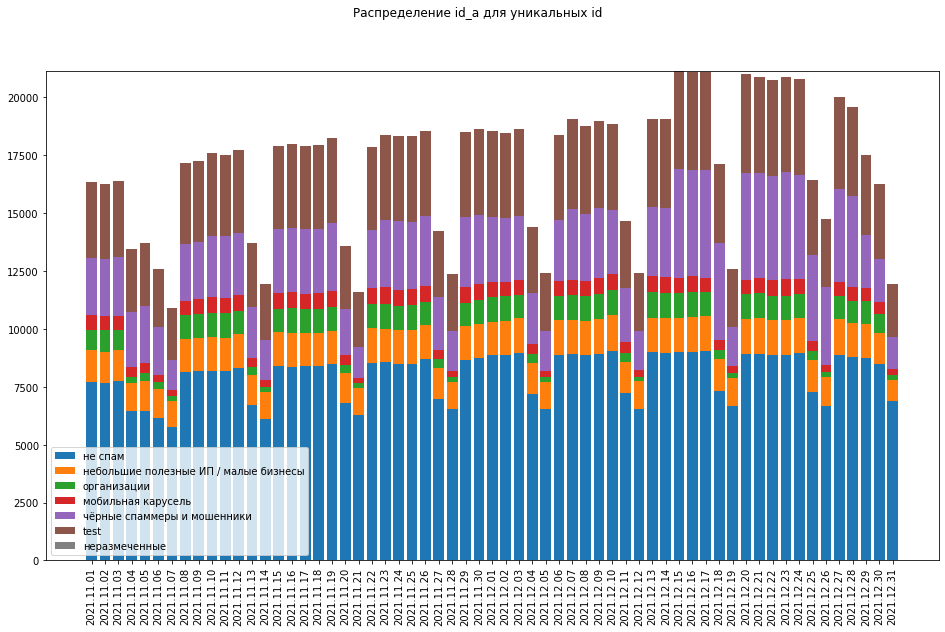

In [12]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.bar(dates, ids_0_a, label=LABELS[0])
bottom = np.array(ids_0_a)
ax.bar(dates, ids_1_a, label=LABELS[1], bottom=bottom)
bottom += np.array(ids_1_a)
ax.bar(dates, ids_2_a, label=LABELS[2], bottom=bottom)
bottom += np.array(ids_2_a)
ax.bar(dates, ids_3_a, label=LABELS[3], bottom=bottom)
bottom += np.array(ids_3_a)
ax.bar(dates, ids_4_a, label=LABELS[4], bottom=bottom)
bottom += np.array(ids_4_a)
ax.bar(dates, ids_test_a, label='test', bottom=bottom)
bottom += np.array(ids_test_a)
ax.bar(dates, ids_unlabeled_a, label='неразмеченные', bottom=bottom, color='gray')

ax.legend()
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
fig.suptitle('Распределение id_a для уникальных id')

plt.show()

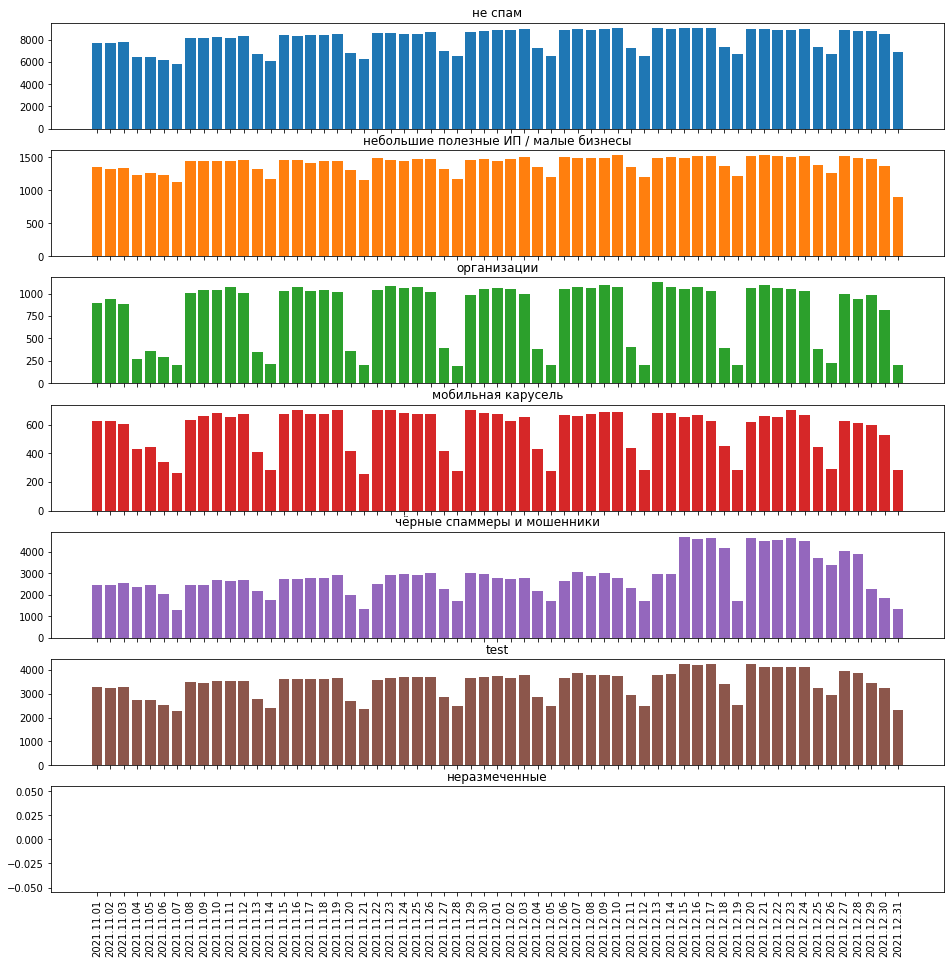

In [13]:
fig, axes = plt.subplots(7, 1, figsize=(16, 16), sharex=True)

axes[0].bar(dates, ids_0_a, color=COLORS[0])
axes[1].bar(dates, ids_1_a, color=COLORS[1])
axes[2].bar(dates, ids_2_a, color=COLORS[2])
axes[3].bar(dates, ids_3_a, color=COLORS[3])
axes[4].bar(dates, ids_4_a, color=COLORS[4])
axes[5].bar(dates, ids_test_a, color=COLORS[5])
axes[6].bar(dates, ids_unlabeled_a, color=COLORS[6])

axes[0].set_title(LABELS[0])
axes[1].set_title(LABELS[1])
axes[2].set_title(LABELS[2])
axes[3].set_title(LABELS[3])
axes[4].set_title(LABELS[4])
axes[5].set_title('test')
axes[6].set_title('неразмеченные')

for tick in axes[6].get_xticklabels():
    tick.set_rotation(90)

plt.show()

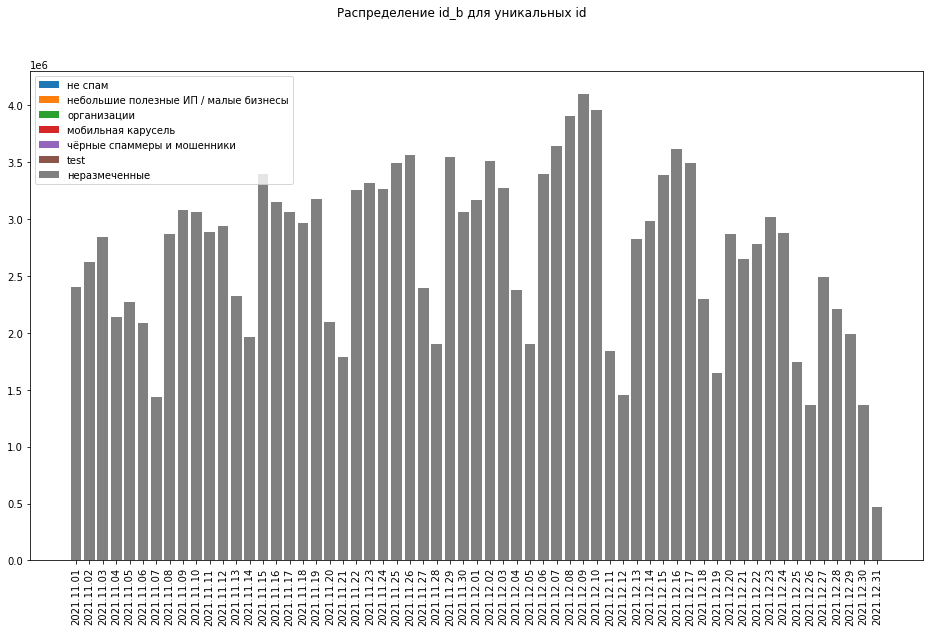

In [14]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.bar(dates, ids_0_b, label=LABELS[0])
bottom = np.array(ids_0_b)
ax.bar(dates, ids_1_b, label=LABELS[1], bottom=bottom)
bottom += np.array(ids_1_b)
ax.bar(dates, ids_2_b, label=LABELS[2], bottom=bottom)
bottom += np.array(ids_2_b)
ax.bar(dates, ids_3_b, label=LABELS[3], bottom=bottom)
bottom += np.array(ids_3_b)
ax.bar(dates, ids_4_b, label=LABELS[4], bottom=bottom)
bottom += np.array(ids_4_b)
ax.bar(dates, ids_test_b, label='test', bottom=bottom)
bottom += np.array(ids_test_b)
ax.bar(dates, ids_unlabeled_b, label='неразмеченные', bottom=bottom, color='gray')

ax.legend()
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
fig.suptitle('Распределение id_b для уникальных id')


plt.show()